In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.preprocessing import outliers_preprocess
from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


In [2]:
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'
# ,"CF3_log", "CF123_log"
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "fill_grp":"",
    "old_pipe":False,  
    "cross_val": False,
}

Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

In [4]:
preprocessed_dataset["CF1"] = preprocessed_dataset["CF1_merge"] 
preprocessed_dataset["CF2"] = preprocessed_dataset["CF2_merge"] 
preprocessed_dataset["CF3"] = preprocessed_dataset["CF3_merge"] 
preprocessed_dataset["CF123"] = preprocessed_dataset["CF123_merge"] 

threshold_under=1.5
threshold_over=2.5
for target in ["CF1_merge", "CF2_merge", "CF3_merge", "CF123_merge"] : 
    preprocessed_dataset = outliers_preprocess(preprocessed_dataset, target, threshold_under=threshold_under, threshold_over=threshold_over)


In [5]:
# threshold_under=1.5
# threshold_over=2.5

# scope = "CF1_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF2_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF3_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# print("\n")

# scope = "CF123_merge"
# temp = preprocessed_dataset[(preprocessed_dataset[scope].notna())]
# print(scope,)
# res = outliers_preprocess(temp, scope, threshold_under=threshold_under, threshold_over=np.inf)
# print( "nb_rows filtered (under):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")
# res = outliers_preprocess(temp, scope, threshold_under=np.inf, threshold_over=threshold_over)
# print( "nb_rows filtered (over):", len(temp) - len(res), " (",(len(temp) - len(res))/len(temp)*100,"%)")

# Base example

In [5]:
# test de base 28minutes ? 
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_base_222223",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train=Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
)

CF1_log
Files not found, constructing them
preprocessing done


2023/08/02 14:03:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 14:04:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 63
Created version '63' of model 'xgboost'.
2023/08/02 14:04:16 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 14:04:21 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 63
Created version '63' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/08/02 14:04:21 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 14:04:26 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 63
Created version '63' of model 'lgbm'.


modelisation done
CF2_log
Using pre created preprocessed files
preprocessing done


2023/08/02 14:04:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 14:04:51 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 64
Created version '64' of model 'xgboost'.
2023/08/02 14:04:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 14:05:03 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 64
Created version '64' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 14:05:04 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 14:05:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 64
Created version '64' of model 'lgbm'.


modelisation done
CF3_log
Using pre created preprocessed files
preprocessing done


2023/08/02 14:05:23 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 14:05:29 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 65
Created version '65' of model 'xgboost'.
2023/08/02 14:05:36 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 14:05:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 65
Created version '65' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/08/02 14:05:41 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 14:05:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 65
Created version '65' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/02 14:05:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 14:06:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 66
Created version '66' of model 'xgboost'.
2023/08/02 14:06:09 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 14:06:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 66
Created version '66' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 14:06:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 14:06:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 66


modelisation done


Created version '66' of model 'lgbm'.


In [6]:
best_scores
# outlier after  [0.718863070915766, 0.5436700671297622, 1.0526040758198016, 0.6342521777936404] 
# outlier before (drop) 
# [0.4940438778909675,
#  0.4899781334699924,
#  0.9720296280063642,
#  0.5320520022173726]
# outlier before (drop) : 
# [0.5233991620098789,
# 0.40811509811421237, 
# 0.85109105089482, 
# 0.5229286278975259]
# outlier before (replace na)

[0.7018124871336399,
 0.5313084292372081,
 1.0378449220709638,
 0.6290781450386738]

In [8]:
summary_global

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,xgboost,0.482822,0.546461,0.770669,0.739230,44.769495,0.162520
1,CF1_log,catboost,0.463457,0.523665,0.780236,0.723647,45.003887,0.159096
2,CF1_log,lgbm,0.463886,0.516764,0.783132,0.718863,44.535893,0.164587
3,CF2_log,xgboost,0.381086,0.324559,0.736243,0.569700,0.140337,0.124640
4,CF2_log,catboost,0.358869,0.295577,0.759795,0.543670,0.134956,0.134326
5,CF2_log,lgbm,0.372086,0.317401,0.742059,0.563384,0.140961,0.136596
6,CF3_log,xgboost,0.832447,1.219223,0.508780,1.104184,0.260484,0.124407
7,CF3_log,catboost,0.793675,1.107975,0.553601,1.052604,0.253250,0.122754
8,CF3_log,lgbm,0.802136,1.127447,0.545756,1.061813,0.254507,0.108658
9,CF123_log,xgboost,0.489345,0.444197,0.733354,0.666481,0.105118,0.105099


In [5]:
# training_parameters["cross_val"] = True

In [5]:
# test de base 2 ? 
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_base_781",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train=Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
)

CF1_log
Files not found, constructing them
preprocessing done


2023/08/02 09:54:37 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 09:54:54 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 50
Created version '50' of model 'xgboost'.
2023/08/02 09:55:00 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 09:55:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 50
Created version '50' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002266 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/02 09:55:05 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 09:55:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 50
Created version '50' of model 'lgbm'.


modelisation done
CF2_log
Files not found, constructing them
preprocessing done


2023/08/02 10:00:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 10:00:52 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 51
Created version '51' of model 'xgboost'.
2023/08/02 10:00:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 10:01:01 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 51
Created version '51' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/08/02 10:01:02 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 10:01:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 51
Created version '51' of model 'lgbm'.


modelisation done
CF3_log
Files not found, constructing them
preprocessing done


2023/08/02 10:06:50 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 10:06:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 52
Created version '52' of model 'xgboost'.
2023/08/02 10:07:01 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 10:07:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 52
Created version '52' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/08/02 10:07:06 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 10:07:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 52
Created version '52' of model 'lgbm'.


modelisation done
CF123_log
Files not found, constructing them
preprocessing done


2023/08/02 10:15:53 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/02 10:16:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 53
Created version '53' of model 'xgboost'.
2023/08/02 10:16:12 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/02 10:16:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 53
Created version '53' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


2023/08/02 10:16:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/02 10:16:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 53
Created version '53' of model 'lgbm'.


modelisation done


In [7]:
best_scores 

# initial grid
# [0.718863070915766, 
#  0.5436700671297622, 
#  1.0526040758198016, 
#  0.6342521777936404]

# just using inf threshold
# [0.7018124871336399, # better 
#  0.5313084292372081, # better 
#  1.0378449220709638, # better 
#  0.6290781450386738] # better 


# CF123 comparison : 
# [0.7234012636609329, # worse
#  0.5650729256715145, # worse
#  1.0565618159862236, # worse
#  0.6342521777936404] # same (normal)

# Outliers removal before split # faire cette étape séparément, en amont du split ? 
# [0.5283557509005923,
#  0.42400993566684136,
#  0.8966142053519602,
#  0.5533837847917039]

# global removal (remove line for all scopes instead of per scopes) : 
# [0.4940438778909675, # better
#  0.4899781334699924, # worse
#  0.9720296280063642, # worse
#  0.5320520022173726] # better


[0.5283557509005923,
 0.42400993566684136,
 0.8966142053519602,
 0.5533837847917039]

In [10]:
summary_global

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,xgboost,0.482822,0.546461,0.770669,0.739230,44.769495,0.162520
1,CF1_log,catboost,0.463457,0.523665,0.780236,0.723647,45.003887,0.159096
2,CF1_log,lgbm,0.463886,0.516764,0.783132,0.718863,44.535893,0.164587
3,CF2_log,xgboost,0.381086,0.324559,0.736243,0.569700,0.140337,0.124640
4,CF2_log,catboost,0.358869,0.295577,0.759795,0.543670,0.134956,0.134326
5,CF2_log,lgbm,0.372086,0.317401,0.742059,0.563384,0.140961,0.136596
6,CF3_log,xgboost,0.832447,1.219223,0.508780,1.104184,0.260484,0.124407
7,CF3_log,catboost,0.793675,1.107975,0.553601,1.052604,0.253250,0.122754
8,CF3_log,lgbm,0.802136,1.127447,0.545756,1.061813,0.254507,0.108658
9,CF123_log,xgboost,0.489345,0.444197,0.733354,0.666481,0.105118,0.105099


# Restriction to CF123 filter

In [37]:
# test restricted to CF123
targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]

best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    name_experiment="restriction_CF123_test_uniform test_CVTrue",
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    # Summary_Final_train =Summary_Final_train,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    open_data=False,
    save=False,
)

CF1_log_CF123


Using pre created preprocessed files
preprocessing done


2023/08/01 12:03:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:03:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 38
Created version '38' of model 'xgboost'.
2023/08/01 12:03:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:03:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 38
Created version '38' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:03:56 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:03:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 38
Created version '38' of model 'lgbm'.


modelisation done
CF2_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 39
Created version '39' of model 'xgboost'.
2023/08/01 12:04:15 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 39
Created version '39' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 39
Created version '39' of model 'lgbm'.


modelisation done
CF3_log_CF123
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:33 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 40
Created version '40' of model 'xgboost'.
2023/08/01 12:04:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:04:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 40
Created version '40' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:04:42 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:04:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 40
Created version '40' of model 'lgbm'.


modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done


2023/08/01 12:04:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'xgboost' already exists. Creating a new version of this model...
2023/08/01 12:04:57 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost, version 41
Created version '41' of model 'xgboost'.
2023/08/01 12:05:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'catboost' already exists. Creating a new version of this model...
2023/08/01 12:05:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: catboost, version 41
Created version '41' of model 'catboost'.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.


2023/08/01 12:05:06 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
Registered model 'lgbm' already exists. Creating a new version of this model...
2023/08/01 12:05:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: lgbm, version 41


modelisation done


Created version '41' of model 'lgbm'.


In [38]:
best_scores # with CF123 standardization
# no CV [0.7234012636609329,
#  0.5650729256715145,
#  1.0565618159862236,
#  0.6342521777936404]

[0.7234012636609329,
 0.5650729256715145,
 1.0565618159862236,
 0.6342521777936404]

In [39]:
summary_global # with CF123 standardization

,Target,model,mae,mse,r2,rmse,mape,std
0,CF1_log,xgboost,0.482822,0.546461,0.770669,0.739230,44.769495,0.162520
1,CF1_log,catboost,0.463457,0.523665,0.780236,0.723647,45.003887,0.159096
2,CF1_log,lgbm,0.463886,0.516764,0.783132,0.718863,44.535893,0.164587
3,CF2_log,xgboost,0.381086,0.324559,0.736243,0.569700,0.140337,0.124640
4,CF2_log,catboost,0.358869,0.295577,0.759795,0.543670,0.134956,0.134326
...,...,...,...,...,...,...,...,...
67,CF3_log_CF123,catboost,0.798909,1.116323,0.550259,1.056562,0.256520,0.128285
68,CF3_log_CF123,lgbm,0.810668,1.139071,0.541094,1.067273,0.255077,0.120722
69,CF123_log,xgboost,0.489345,0.444197,0.733354,0.666481,0.105118,0.105099
70,CF123_log,catboost,0.463994,0.403767,0.757624,0.635426,0.099703,0.098183


# Test seed influence

In [15]:
from functions.preprocessing import custom_train_split
from functions.results import  metrics

training_parameters["cross_val"] = True

In [16]:
# Analyse variance seed model

targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]
name_experiment = "analysis_seed_model_influence_00"

best_scores = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}
best_stds = {
    "CF1_log_CF123" : [],
    "CF2_log_CF123" : [],
    "CF3_log_CF123" : [],
    "CF123_log" : [],
}

for target in targets:
    print(target)
    test_scores = []
    test_stds = []
    (
        X_train,
        y_train,
        X_test,
        y_test,
        df_test,
    ) = custom_train_split(
        preprocessed_dataset,
        path_Benchmark,
        path_intermediary,
        target,
        # threshold_under=training_parameters["threshold_under"],
        # threshold_over=training_parameters["threshold_over"],
        extended_features=training_parameters["extended_features"],
        selec_sect=training_parameters["selec_sect"],
        fill_grp=training_parameters["fill_grp"],
        old_pipe=training_parameters["old_pipe"],
        open_data=False,
    )
    # seed = (training_parameters["seed"])
    n_iter = (training_parameters["n_iter"])
    print("preprocessing done")
    for seed in range(10) : 
        for i, (model_name, model) in enumerate(models.items()):
        # with mlflow.start_run() as run:
            model_i = model(
                X_train,
                y_train,
                cross_val=training_parameters["cross_val"],
                n_jobs=-1,
                verbose=0,
                n_iter=n_iter,
                seed=seed,
            )
            y_pred = model_i.predict(X_test)

            summary_global, rmse, std = metrics(y_test, y_pred, Summary_Final, target, model_name)
            ensemble.append(model_i)
            test_scores.append(rmse)
            test_stds.append(std)

        best_scores[target].append(test_scores[test_scores.index(min(test_scores))])
        best_stds[target].append(test_stds[test_scores.index(min(test_scores))])
    print("modelisations done")


CF1_log_CF123
Using pre created preprocessed files
preprocessing done
[16:19:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
best_scores[target]

[0.6290781450386738,
 0.6290781450386738,
 0.6290781450386738,
 0.6282319689579591,
 0.6282319689579591,
 0.6261809495069609,
 0.6261809495069609,
 0.6261809495069609,
 0.6261809495069609,
 0.6261809495069609]

CF1_log_CF123
0.6923815552945992  +/-  1.1102230246251565e-16 (variance due to seed)
0.6923815552945992  +/-  0.13894895187083298 (variance due to test set)


<AxesSubplot: >

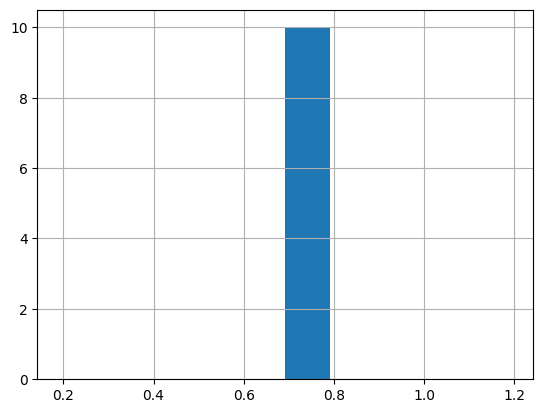

In [ ]:
target = targets[0]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]), "(variance due to seed)")
print(np.mean(best_scores[target]), " +/- ", np.mean(best_stds[target]), "(variance due to test set)")
pd.Series(best_scores[target]).hist()

CF2_log_CF123
0.5582740268600667  +/-  0.0009480384922059788


<AxesSubplot: >

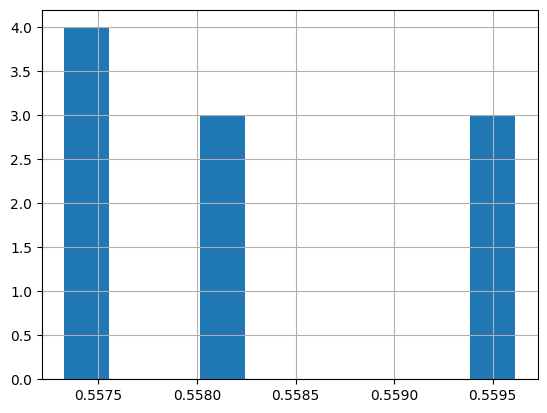

In [ ]:
target = targets[1]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF3_log_CF123
1.0396872802241741  +/-  0.000517234639291786


<AxesSubplot: >

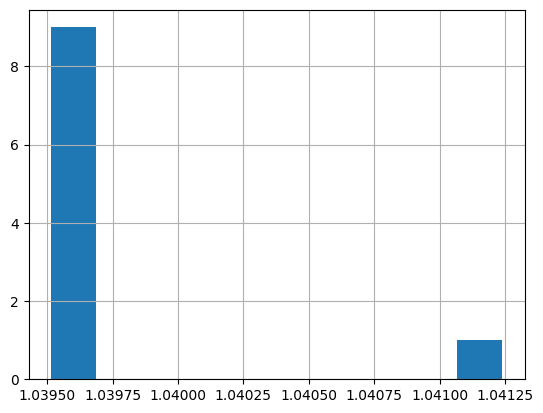

In [ ]:
target = targets[2]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

CF123_log
0.6274603120566744  +/-  0.001312512936606054


<AxesSubplot: >

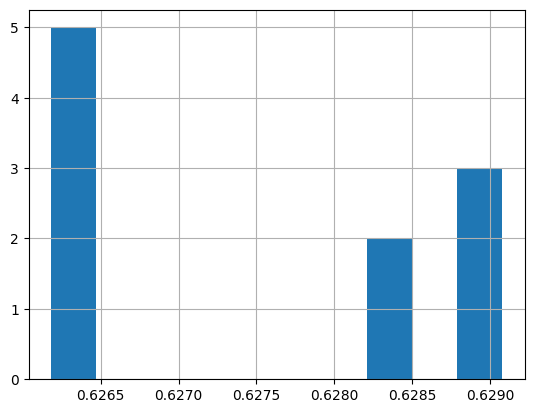

In [ ]:
target = targets[3]
print(target)
print(np.mean(best_scores[target]), " +/- ", np.std(best_scores[target]))
pd.Series(best_scores[target]).hist()

# Test weighted OLS

In [ ]:
import statsmodels as sm

In [ ]:
# Analyse variance seed model

targets = ["CF1_log_CF123","CF2_log_CF123","CF3_log_CF123", "CF123_log"]
name_experiment = "test_weighted_OLS"

best_scores = []
best_stds = []

for target in targets:
    print(target)
    test_scores = []
    test_stds = []
    (
        X_train,
        y_train,
        X_test,
        y_test,
        df_test,
        df_train,
        df_test_before_imputation,
        df_train_before_imputation,
    ) = custom_train_split(
        preprocessed_dataset,
        path_Benchmark,
        path_intermediary,
        target,
        threshold_under=training_parameters["threshold_under"],
        threshold_over=training_parameters["threshold_over"],
        extended_features=training_parameters["extended_features"],
        selec_sect=training_parameters["selec_sect"],
        fill_grp=training_parameters["fill_grp"],
        old_pipe=training_parameters["old_pipe"],
        open_data=False,
    )
    seed = training_parameters["seed"]
    n_iter = training_parameters["n_iter"]
    print("preprocessing done")
    weights = []

    for i, (model_name, model) in enumerate(models.items()):
        model_ols = sm.WLS(y_train, X_train, weights=weights).fit()
        y_pred = model_i.predict(X_test)

        summary_global, rmse, std = metrics(y_test, y_pred, Summary_Final, target, model_name)
        # ensemble.append(model_i)
        test_scores.append(rmse)
        test_stds.append(std)

    best_scores.append(test_scores[test_scores.index(min(test_scores))])
    best_stds.append(test_stds[test_scores.index(min(test_scores))])
    print("modelisations done")
